In [1]:
import torch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import time
import re
from google.colab import drive
from tqdm import tqdm
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
input_path = '/content/drive/MyDrive/academic_tree/data/Scinet/SciSciNet_Papers.tsv'
output_prefix = '/content/drive/MyDrive/academic_tree/data/Scinet/chunk_'  # 输出文件前缀
chunk_size = 5_000_000  # 每次处理500万行

# 分块读取并保存
import gc

for i, chunk in enumerate(pd.read_csv(input_path, sep='\t', chunksize=chunk_size)):
    chunk.to_csv(f"{output_prefix}{i}.csv", index=False)
    print(f"已保存第{i}个文件，行数: {len(chunk)}")
    del chunk  # 显式删除分块
    gc.collect()  # 立即回收内存

已保存第0个文件，行数: 5000000
已保存第1个文件，行数: 5000000
已保存第2个文件，行数: 5000000
已保存第3个文件，行数: 5000000
已保存第4个文件，行数: 5000000
已保存第5个文件，行数: 5000000
已保存第6个文件，行数: 5000000
已保存第7个文件，行数: 5000000
已保存第8个文件，行数: 5000000
已保存第9个文件，行数: 5000000
已保存第10个文件，行数: 5000000
已保存第11个文件，行数: 5000000
已保存第12个文件，行数: 5000000
已保存第13个文件，行数: 5000000
已保存第14个文件，行数: 5000000
已保存第15个文件，行数: 5000000
已保存第16个文件，行数: 5000000
已保存第17个文件，行数: 5000000
已保存第18个文件，行数: 5000000
已保存第19个文件，行数: 5000000
已保存第20个文件，行数: 5000000
已保存第21个文件，行数: 5000000
已保存第22个文件，行数: 5000000
已保存第23个文件，行数: 5000000
已保存第24个文件，行数: 5000000
已保存第25个文件，行数: 5000000
已保存第26个文件，行数: 4129188


总行数: 134,129,188

In [ ]:
input_path = '/content/drive/MyDrive/academic_tree/data/Scinet/SciSciNet_PaperFields.tsv'
output_prefix = '/content/drive/MyDrive/academic_tree/data/Scinet/chunk_'  # 输出文件前缀
chunk_size = 20_000_000  # 每次处理500万行

# 分块读取并保存
import gc

for i, chunk in enumerate(pd.read_csv(input_path, sep='\t', chunksize=chunk_size)):
    chunk.to_csv(f"{output_prefix}{i}.csv", index=False)
    print(f"已保存第{i}个文件，行数: {len(chunk)}")
    del chunk  # 显式删除分块
    gc.collect()  # 立即回收内存

已保存第0个文件，行数: 20000000
已保存第1个文件，行数: 20000000
已保存第2个文件，行数: 20000000
已保存第3个文件，行数: 20000000
已保存第4个文件，行数: 20000000
已保存第5个文件，行数: 20000000
已保存第6个文件，行数: 20000000
已保存第7个文件，行数: 20000000
已保存第8个文件，行数: 20000000
已保存第9个文件，行数: 20000000
已保存第10个文件，行数: 20000000
已保存第11个文件，行数: 20000000
已保存第12个文件，行数: 20000000
已保存第13个文件，行数: 17494994


In [ ]:
import pandas as pd
import os

input_dir = '/content/drive/MyDrive/academic_tree/data/Scinet'
output_file = '/content/drive/MyDrive/academic_tree/data/Scinet/merged_data.csv'

# 首次写入（包含表头）
csv_files = [f for f in os.listdir(input_dir) if f.startswith('chunk')]


# 首次写入（包含表头）
first_file = True
for file in tqdm(csv_files, desc="合并进度"):
    chunk = pd.read_csv(os.path.join(input_dir, file))
    chunk.to_csv(output_file, mode='a', index=False, header=first_file)
    first_file = False  # 后续文件不重复写入表头
print(f"合并完成！输出文件大小: {os.path.getsize(output_file)/1e6:.2f} MB")

合并进度: 100%|██████████| 14/14 [25:28<00:00, 109.17s/it]

合并完成！输出文件大小: 12480.78 MB


In [ ]:
print(f"合并完成！输出文件大小: {os.path.getsize(output_file)/1e6:.2f} MB")

合并完成！输出文件大小: 12480.78 MB


In [ ]:
# 读取前 10,000 行
merged_df = pd.read_csv('/content/drive/MyDrive/academic_tree/data/Scinet/SciSciNet_Papers.csv', nrows=100000)


In [ ]:
authorship=pd.read_csv('/content/drive/MyDrive/academic_tree/data/authorship.csv')
# 初始化一个空DataFrame用于存储结果
final_df = pd.DataFrame()
# 每次读取的行数（500万行）
chunk_size = 5_000_000
# 需要匹配的PaperID列表（提前获取）
target_paper_ids = authorship.MAGPaperID.unique()

# 分块读取大文件
for chunk in pd.read_csv('/content/drive/MyDrive/academic_tree/data/Scinet/SciSciNet_Papers.csv',
                        chunksize=chunk_size):

    # 筛选当前chunk中符合条件的行
    filtered_chunk = chunk[chunk.PaperID.isin(target_paper_ids)]

    # 将结果追加到final_df
    final_df = pd.concat([final_df, filtered_chunk], ignore_index=True)

    # 可选：打印进度
    print(f"Processed {len(final_df)} matching rows so far...")

# 最终结果在final_df中
print(f"Total matching rows found: {len(final_df)}")

Processed 539732 matching rows so far...
Processed 1077393 matching rows so far...
Processed 1616342 matching rows so far...
Processed 2155293 matching rows so far...
Processed 2693056 matching rows so far...
Processed 3231794 matching rows so far...
Processed 3771743 matching rows so far...
Processed 4310247 matching rows so far...
Processed 4847505 matching rows so far...
Processed 5387699 matching rows so far...
Processed 5927152 matching rows so far...
Processed 6464826 matching rows so far...
Processed 7004981 matching rows so far...
Processed 7543168 matching rows so far...
Processed 8081354 matching rows so far...
Processed 8620053 matching rows so far...
Processed 9158148 matching rows so far...
Processed 9696214 matching rows so far...
Processed 10235745 matching rows so far...
Processed 10773258 matching rows so far...
Processed 11311906 matching rows so far...
Processed 11850813 matching rows so far...
Processed 12390186 matching rows so far...
Processed 12929469 matching ro

Paper的top level and sub level

In [ ]:
merged_df=pd.read_csv('/content/drive/MyDrive/academic_tree/data/Scinet/SciSciNet_Fields.csv')
authorship=pd.read_csv('/content/drive/MyDrive/academic_tree/data/authorship.csv')
field=pd.read_csv('/content/drive/MyDrive/academic_tree/data/Scinet/SciSciNet_Fields.tsv',sep='\t')

In [ ]:
merged_df.shape

(277494994, 6)

In [ ]:
field

,FieldID,Field_Name,Field_Type
0,3079626,Quantum electrodynamics,Sub
1,37914503,Mathematical physics,Sub
2,159047783,Virology,Sub
3,70410870,Clinical psychology,Sub
4,187212893,Pediatrics,Sub
...,...,...,...
306,70721500,Computational biology,Sub
307,42360764,Chemical engineering,Sub
308,178550888,Business administration,Sub
309,13736549,Industrial engineering,Sub


In [ ]:
field.Field_Type.value_counts()

,count
Field_Type,
Sub,292
Top,19


In [ ]:
authorship.shape

(26378069, 2)

In [ ]:
len(authorship.MAGPaperID.unique())

16942415

In [ ]:
authorship_ment=merged_df[merged_df.PaperID.isin(authorship.MAGPaperID)]

In [ ]:
authorship_ment

,PaperID,FieldID,Hit_1pct,Hit_5pct,Hit_10pct,C_f,Field_Name,Field_Type
0,113998959,71924100,0.0,0.0,0.0,0.270789,Medicine,Top
1,38064030,121332964,0.0,0.0,0.0,0.093360,Physics,Top
2,18936491,185592680,0.0,0.0,0.0,0.620974,Chemistry,Top
3,132789698,33923547,0.0,1.0,1.0,6.399932,Mathematics,Top
4,38064225,95457728,1.0,1.0,1.0,22.251954,History,Top
...,...,...,...,...,...,...,...,...
34918037,3041518463,159985019,0.0,0.0,0.0,0.262393,Composite material,Sub
34918038,3041518536,159047783,0.0,0.0,0.0,0.000000,Virology,Sub
34918039,3041518618,60644358,0.0,0.0,0.0,0.000000,Bioinformatics,Sub
34918040,3041518653,200601418,0.0,0.0,0.0,1.446718,Reliability engineering,Sub


In [ ]:
#len(authorship.MAGPaperID.unique())
#16942415
authorship_ment=authorship_ment.merge(field,on='FieldID')

In [ ]:
authorship_ment.PaperID.value_counts().head(10)

,count
PaperID,
2121927366,7
2305395239,7
2027442956,6
1669761370,6
2074295319,6
2262759681,6
2084347472,6
2153149612,6
2094332243,6


In [ ]:
len(authorship_ment.PaperID.unique())

14253313

In [ ]:
authorship_ment[authorship_ment.PaperID==2262759681]

,PaperID,FieldID,Hit_1pct,Hit_5pct,Hit_10pct,C_f,Field_Name,Field_Type
9544215,2262759681,71924100,0.0,0.0,1.0,3.204047,Medicine,Top
28974150,2262759681,126838900,0.0,0.0,1.0,3.770881,Radiology,Sub
28974153,2262759681,164705383,0.0,0.0,1.0,3.233327,Cardiology,Sub
28974154,2262759681,154945302,0.0,0.0,1.0,2.102650,Artificial intelligence,Sub
28974155,2262759681,119857082,0.0,0.0,0.0,1.228867,Machine learning,Sub
28974157,2262759681,126322002,0.0,0.0,0.0,2.378892,Internal medicine,Sub


26378069 authorship 16942415 papers
MAG数据里面缺失了

22195049 authorship 14253313 papers


In [ ]:
import pandas as pd
from tqdm import tqdm
import os


# 2. 聚合函数（与图片数据结构完全匹配）
def aggregate_paper(group):
    return pd.Series({
        'Sub_fieldID': group[group['Field_Type'] == 'Sub']['FieldID'].tolist(),
        'Sub_fieldNames': group[group['Field_Type'] == 'Sub']['Field_Name'].tolist(),
        'Top_fieldID': group[group['Field_Type'] == 'Top']['FieldID'].tolist(),
        'Top_fieldNames': group[group['Field_Type'] == 'Top']['Field_Name'].tolist(),
        'sub_hit_1' : group[group['Field_Type'] == 'Sub']['Hit_1pct'].max(),
        'sub_hit_5' : group[group['Field_Type'] == 'Sub']['Hit_5pct'].max(),
        'sub_hit_10' : group[group['Field_Type'] == 'Sub']['Hit_10pct'].max(),
        'top_Hit_1pct': group[group['Field_Type'] == 'Top']['Hit_1pct'].max(),
        'top_Hit_5pct': group[group['Field_Type'] == 'Top']['Hit_5pct'].max(),
        'top_Hit_10pct': group[group['Field_Type'] == 'Top']['Hit_10pct'].max(),
        'C_f_mean': group['C_f'].mean()
    })

# 3. 分阶段处理与保存
def process_with_checkpoints(df, output_path, checkpoint_interval=0.2):
    # 获取唯一PaperID（图片中示例为2262759681）
    paper_ids = df['PaperID'].unique()
    total_papers = len(paper_ids)
    checkpoint_step = int(total_papers * checkpoint_interval)

    # 准备输出文件
    if os.path.exists(output_path):
        os.remove(output_path)

    # 分批次处理
    for i in tqdm(range(0, total_papers, checkpoint_step), desc="处理进度"):
        batch_ids = paper_ids[i:i+checkpoint_step]
        batch_df = df[df['PaperID'].isin(batch_ids)]

        # 聚合处理（完全匹配图片中的分组逻辑）
        result = batch_df.groupby('PaperID').apply(aggregate_paper)
        result.reset_index(inplace=True)

        # 保存检查点（追加模式）
        result.to_csv(output_path, mode='a', header=not os.path.exists(output_path), index=False)

        # 释放内存
        del batch_df, result
        import gc; gc.collect()



# 执行分阶段处理
output_file = '/content/drive/MyDrive/academic_tree/data/Scinet/MAGpaper_fields2.csv'
process_with_checkpoints(authorship_ment, output_file, checkpoint_interval=0.2)

print(f"处理完成！结果已保存至 {output_file}")

处理进度:   0%|          | 0/6 [00:00<?, ?it/s]/tmp/ipython-input-25-3760837591.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = batch_df.groupby('PaperID').apply(aggregate_paper)
处理进度:  17%|█▋        | 1/6 [2:01:55<10:09:35, 7315.14s/it]/tmp/ipython-input-25-3760837591.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = batch_df.groupby('PaperID').apply(aggregate_paper)
处理进度:  33%|███▎  

处理完成！结果已保存至 /content/drive/MyDrive/academic_tree/data/Scinet/MAGpaper_fields2.csv


In [ ]:
final_df=pd.read_csv('/content/drive/MyDrive/academic_tree/data/Scinet/MAGpaper_fields.csv')

In [ ]:
final_df[final_df.PaperID==2262759681]

,PaperID,Sub_fieldID,Sub_fieldNames,Top_fieldID,Top_fieldNames,hit_1_records,hit_5_records,hit_10_records,Hit_1pct_max,Hit_5pct_max,Hit_10pct_max,C_f_mean
9687624,2262759681,"[126838900, 164705383, 154945302, 119857082, 1...","['Radiology', 'Cardiology', 'Artificial intell...",[71924100],['Medicine'],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 1.0, 0.0, 0.0]",0.0,0.0,1.0,2.653111


In [ ]:
final_df

,PaperID,Sub_fieldID,Sub_fieldNames,Top_fieldID,Top_fieldNames,hit_1_records,hit_5_records,hit_10_records,Hit_1pct_max,Hit_5pct_max,Hit_10pct_max,C_f_mean
0,285,"[185544564, 109214941]","['Nuclear physics', 'Particle physics']",[121332964],['Physics'],"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",0.0,0.0,0.0,1.288809
1,524,"[185544564, 115704247]","['Nuclear physics', 'Analytical chemistry']",[121332964],['Physics'],"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 1.0, 0.0]",0.0,0.0,1.0,2.664144
2,536,[87355193],['Astrobiology'],[127313418],['Geology'],"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]",0.0,0.0,0.0,1.793563
3,763,"[105702510, 43617362]","['Anatomy', 'Chromatography']",[192562407],['Materials science'],"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[1.0, 0.0, 1.0]",0.0,0.0,1.0,2.954724
4,997,"[24326235, 65244806]","['Electronic engineering', 'Control theory']",[127413603],['Engineering'],"[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]",0.0,0.0,0.0,0.436986
...,...,...,...,...,...,...,...,...,...,...,...,...
14253308,3087763300,[95444343],['Cell biology'],[185592680],['Chemistry'],"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]",0.0,0.0,0.0,0.402137
14253309,3087763338,[1965285],['Earth science'],[39432304],['Environmental science'],"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]",0.0,0.0,0.0,0.656724
14253310,3041510087,[62649853],['Remote sensing'],[],[],[0.0],[0.0],[0.0],0.0,0.0,0.0,0.000000
14253311,3041512257,[70721500],['Computational biology'],[],[],[0.0],[0.0],[0.0],0.0,0.0,0.0,0.764966


In [2]:
#final_df.to_csv('/content/drive/MyDrive/academic_tree/data/Scinet/MAGpaper.csv',index=False)
final_df=pd.read_csv('/content/drive/MyDrive/academic_tree/data/Scinet/MAGpaper.csv')

In [3]:
final_df

,PaperID,DOI,DocType,Year,Date,JournalID,ConferenceSeriesID,Citation_Count,C10,Reference_Count,...,SB_T,Patent_Count,Newsfeed_Count,Tweet_Count,NCT_Count,NIH_Count,NSF_Count,WSB_mu,WSB_sigma,WSB_Cinf
0,14558443,10.1007/978-3-662-45174-8_28,Conference,2014.0,2014-10-12,NaN,1.131603e+09,14.0,NaN,11.0,...,NaN,0,0,0,0,0,2,NaN,NaN,NaN
1,16763247,10.22004/AG.ECON.174942,Repository,2014.0,2014-01-01,3.121261e+09,NaN,0.0,NaN,0.0,...,NaN,0,0,0,0,0,0,NaN,NaN,NaN
2,21605082,NaN,Conference,2001.0,2001-04-01,NaN,1.190394e+09,18.0,14.0,2.0,...,NaN,0,0,0,0,0,0,NaN,NaN,NaN
3,35428871,10.1023/A:1022270923160,Journal,1998.0,1998-01-01,2.016092e+08,NaN,6.0,2.0,16.0,...,8.0,0,0,0,0,0,0,NaN,NaN,NaN
4,84890971,NaN,Repository,2003.0,2003-08-01,3.121261e+09,NaN,1.0,0.0,0.0,...,NaN,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14450090,3020875294,10.1016/J.JML.2020.104123,Journal,2020.0,2020-08-01,5.378741e+07,NaN,1.0,NaN,60.0,...,0.0,0,0,0,0,0,0,NaN,NaN,NaN
14450091,3021694233,10.1063/1.5141866,Journal,2020.0,2020-05-05,1.052438e+08,NaN,1.0,NaN,41.0,...,0.0,0,0,0,0,0,0,NaN,NaN,NaN
14450092,3029538394,10.2210/PDB5QGV/PDB,NaN,2019.0,2019-03-27,NaN,NaN,0.0,NaN,0.0,...,NaN,0,0,0,0,0,0,NaN,NaN,NaN
14450093,3047500593,10.1007/978-981-15-6109-2_10,NaN,2020.0,2020-01-01,NaN,NaN,0.0,NaN,49.0,...,NaN,0,0,0,0,0,0,NaN,NaN,NaN


In [4]:
#authorship.csv lists all the MAG paper IDs of each researcher and has two columns: person ID (PID) and MAG paper ID
#len(authorship.MAGPaperID.unique())
#16942415
#authorship有26378069行
authorship=pd.read_csv('/content/drive/MyDrive/academic_tree/data/authorship.csv')

In [6]:
authorship

,PID,MAGPaperID
0,1,1519578210
1,1,1972926514
2,1,1981764347
3,1,1982956265
4,1,1990434553
...,...,...
26378064,839680,2899949966
26378065,839680,2962727896
26378066,839680,2965878599
26378067,839680,2966049521


In [7]:
len(authorship.MAGPaperID.unique())

16942415

In [ ]:
authorship.describe()

,PID,MAGPaperID,Year,JournalID,ConferenceSeriesID,Citation_Count,C10,Reference_Count,C5,Team_Size,...,SB_T,Patent_Count,Newsfeed_Count,Tweet_Count,NCT_Count,NIH_Count,NSF_Count,WSB_mu,WSB_sigma,WSB_Cinf
count,2.219505e+07,2.219505e+07,2.219505e+07,1.868632e+07,1.325012e+06,2.219505e+07,1.306282e+07,2.219505e+07,1.822954e+07,2.219505e+07,...,1.578519e+07,2.219505e+07,2.219505e+07,2.219505e+07,2.219505e+07,2.219505e+07,2.219505e+07,912007.000000,9.120070e+05,912007.000000
mean,3.883740e+05,2.175644e+09,2.006011e+03,3.473279e+08,1.804314e+09,4.679159e+01,3.588634e+01,2.849051e+01,2.129737e+01,4.433653e+01,...,3.207574e+00,1.119752e+00,2.579409e-02,1.348602e+00,1.098695e-02,4.529450e-01,1.424171e-01,8.084304,1.322697e+00,290.625939
std,2.682384e+05,5.307963e+08,1.283885e+01,7.576246e+08,7.412484e+08,2.269632e+02,1.211552e+02,3.881926e+01,8.274226e+01,3.031070e+02,...,5.704959e+00,2.702118e+01,4.732186e-01,3.716240e+01,1.730988e-01,2.182222e+00,7.542380e-01,1.012181,4.929867e-01,1963.189355
min,1.000000e+00,2.850000e+02,1.800000e+03,6.166100e+04,1.119369e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.804660,1.000000e-10,10.000000
25%,1.154970e+05,2.011312e+09,2.001000e+03,6.003070e+07,1.160919e+09,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.370560,9.861975e-01,46.000000
50%,3.947480e+05,2.096013e+09,2.009000e+03,1.175641e+08,1.194992e+09,1.300000e+01,1.200000e+01,2.100000e+01,7.000000e+00,4.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.982050,1.246120e+00,91.000000
75%,6.382100e+05,2.480803e+09,2.015000e+03,1.734992e+08,2.623671e+09,4.100000e+01,3.500000e+01,4.200000e+01,2.100000e+01,7.000000e+00,...,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.760900,1.573160e+00,188.000000
max,8.396800e+05,3.087763e+09,2.022000e+03,3.207771e+09,3.045404e+09,2.709030e+05,6.419300e+04,1.317100e+04,7.139300e+04,5.363000e+03,...,2.190000e+02,2.858500e+04,3.380000e+02,3.259100e+04,1.040000e+02,1.920000e+02,6.100000e+01,21.523700,7.926600e+00,745121.000000


In [ ]:
final_df.rename({'PaperID':'MAGPaperID'},axis=1,inplace=True)

In [ ]:
authorship=authorship.merge(final_df,on=['MAGPaperID'])
#从26378069变成22195049
#len(authorship.PID.unique())包含了479700个人

In [ ]:
authorship.head(1)

,PID,MAGPaperID
0,1,1519578210


In [ ]:
#每个PID下面最新发表文章的时间
#len(authorship.PID.unique())
#479700
latest_pubs = authorship.groupby("PID")["Year"].max().reset_index()
latest_pubs.columns = ["PID", "Latest_Publication_Year"]

earlier_pubs = authorship.groupby("PID")["Year"].min().reset_index()
earlier_pubs.columns = ["PID", "Ealier_Publication_Year"]
#latest_pubs.to_csv("/content/drive/MyDrive/academic_tree/data/link/latest_publications_by_PID.csv", index=False)

In [ ]:
latest_pubs

,PID,Latest_Publication_Year
0,1,2020.0
1,2,2020.0
2,3,2020.0
3,4,2018.0
4,5,2020.0
...,...,...
479695,839676,2020.0
479696,839677,2020.0
479697,839678,2012.0
479698,839679,1996.0


In [ ]:
earlier_pubs

,PID,Ealier_Publication_Year
0,1,1997.0
1,2,2002.0
2,3,1990.0
3,4,2004.0
4,5,2007.0
...,...,...
479695,839676,2000.0
479696,839677,2016.0
479697,839678,1966.0
479698,839679,1989.0


In [ ]:
earlier_pubs.to_csv("/content/drive/MyDrive/academic_tree/data/latest_pub/ealier_publications_by_PID.csv", index=False)

16942415篇paper

In [ ]:
#researcher.csv is a comma-separated values (CSV) file listing 774733 researchers and contains the
#following variables: person ID (PID), first name, middle name, last name, institution, institution MAG ID,
#research area, ORCID, and MAG author ID
researcher=pd.read_csv('/content/drive/MyDrive/academic_tree/data/researcher.csv')

In [ ]:
researcher
#主要是MAGAuthorID为空的行找不到发表

,PID,FirstName,MiddleName,LastName,Institution,InstitutionMAGID,ResearchArea,ORCID,MAGAuthorID
0,1,STEPHEN,V,DAVID,Oregon Health and Science University,165690674.0,"neuro,csd,bme",0000-0003-4135-3104,2.171828e+09
1,2,BENJAMIN,Y,HAYDEN,"University of Minnesota, Twin Cities",130238516.0,neuro,0000-0002-7678-4281,2.082173e+09
2,3,JACK,L,GALLANT,"University of California, Berkeley",95457486.0,"neuro,psych",NaN,2.110166e+09
3,4,BENJAMIN,NaN,WILLMORE,University of Oxford,40120149.0,neuro,NaN,2.183264e+09
4,5,KENDRICK,NORRIS,KAY,"University of Minnesota, Twin Cities",130238516.0,neuro,NaN,2.156587e+09
...,...,...,...,...,...,...,...,...,...
774728,839677,ANNY,NaN,REYES,"University of California, San Diego",36258959.0,neuro,NaN,2.554457e+09
774729,839678,JOHN,A,LEE,University of Sheffield,91136226.0,evol,NaN,2.123316e+09
774730,839679,DAVID,L,SMISEK,NaN,NaN,chemistry,NaN,2.547457e+09
774731,839680,JOHN,F,FARRAR,University of Wales,97429440.0,evol,NaN,2.153002e+09


In [ ]:
# 找出有多个 PID 的 MAGAuthorID
duplicate_mag_authors = (
    researcher.groupby("MAGAuthorID")["PID"]
    .count()  # 计算每个 MAGAuthorID 对应的 PID 数量
    .reset_index()
    .rename(columns={"PID": "PID_count"})
    .query("PID_count > 1")  # 筛选出 PID_count > 1 的记录
)

print("MAGAuthorID 对应多个 PID 的情况：")
print(duplicate_mag_authors)

# 如果需要查看具体的 PID 对应关系
duplicate_pids = (
    researcher[researcher["MAGAuthorID"].isin(duplicate_mag_authors["MAGAuthorID"])]
    .groupby("MAGAuthorID")["PID"]
    .apply(list)  # 将 PID 聚合成列表
    .reset_index()
)


MAGAuthorID 对应多个 PID 的情况：
         MAGAuthorID  PID_count
25      3.127580e+05          2
127     1.594091e+06          2
294     3.966264e+06          2
607     8.360285e+06          2
803     1.102801e+07          2
...              ...        ...
489300  3.037824e+09          2
489382  3.037936e+09          2
489506  3.038086e+09          2
491068  3.080183e+09          2
491213  3.081223e+09          2

[2730 rows x 2 columns]


In [ ]:
duplicate_pids

,MAGAuthorID,PID
0,3.127580e+05,"[39085, 95737]"
1,1.594091e+06,"[774288, 834397]"
2,3.966264e+06,"[3274, 15454]"
3,8.360285e+06,"[8080, 61665]"
4,1.102801e+07,"[735572, 735573]"
...,...,...
2725,3.037824e+09,"[794986, 795233]"
2726,3.037936e+09,"[782607, 822967]"
2727,3.038086e+09,"[50365, 789982]"
2728,3.080183e+09,"[736118, 736477]"


In [ ]:
# 假设 researcher 是你的 DataFrame
pid_list = [39085, 95737]

# 筛选 PID 在列表中的行
selected_rows = researcher[researcher["PID"].isin(pid_list)]


In [ ]:
selected_rows

,PID,FirstName,MiddleName,LastName,Institution,InstitutionMAGID,ResearchArea,ORCID,MAGAuthorID
37070,39085,DAVID,H,ARDELL,University of California,2.803209e+09,compbio,NaN,312758.0
85125,95737,DAVID,HERMAN,ARDELL,Stanford University,9.701800e+07,evol,NaN,312758.0


In [ ]:
#race and gender
gender=pd.read_csv('/content/drive/MyDrive/academic_tree/data/first_name_gender.csv')
race=pd.read_csv('/content/drive/MyDrive/academic_tree/data/full_name_race.csv')

In [ ]:
race

,FullName,race
0,STEPHEN V DAVID,White
1,BENJAMIN Y HAYDEN,White
2,JACK L GALLANT,White
3,BENJAMIN WILLMORE,White
4,KENDRICK NORRIS KAY,White
...,...,...
764095,ANNY REYES,Hispanic
764096,JOHN A LEE,Asian
764097,DAVID L SMISEK,White
764098,JOHN F FARRAR,White


In [ ]:
df=researcher.merge(gender,on=['FirstName'])

In [ ]:
df.gender.value_counts()

,count
gender,
man,374432
woman,264207
unknown,135891


In [ ]:
missing_values = df["gender"].isnull().sum()
print(f"Missing values in 'gender': {missing_values}")

Missing values in 'gender': 0


In [ ]:
researcher["FullName"] = (
    researcher["FirstName"].astype(str) +  # 确保所有列是字符串类型
    " " +
    researcher["MiddleName"].fillna("").astype(str) +  # 处理 None/NaN
    " " +
    researcher["LastName"].astype(str)
).str.strip()  # 去除首尾多余空格


In [ ]:
df=researcher.merge(race,on=['FullName'])

In [ ]:
df.race.value_counts()

,count
race,
White,318326
Asian,44629
Hispanic,38069
Black,10294


In [ ]:
missing_values = df["race"].isnull().sum()
print(f"Missing values in 'race': {missing_values}")

Missing values in 'race': 0


很好，race和gender看上去是没有缺失值的！

In [ ]:
#mentorship.csv contains mentorship relationships between researchers and has 8 variables: relationship ID (CID), mentee’s person ID, mentor’s person ID, mentorship type, the institution where the
#mentorship happened, institution MAG ID, and the start year and stop year of the interaction.
mentorship=pd.read_csv('/content/drive/MyDrive/academic_tree/data/mentorship.csv')

In [ ]:
researcher=pd.read_csv('/content/drive/MyDrive/academic_tree/data/researcher.csv')
researcher=researcher.drop([ 'FirstName', 'MiddleName', 'LastName', 'Institution', 'InstitutionMAGID', 'MAGAuthorID'],axis=1)

In [ ]:
researcher

,PID,ResearchArea,gender,race
0,1,neuro,man,White
1,2,neuro,man,White
2,3,neuro,man,White
3,4,neuro,man,NaN
4,5,neuro,unknown,White
...,...,...,...,...
774741,839677,neuro,woman,NaN
774742,839678,evol,man,Asian
774743,839679,chemistry,man,White
774744,839680,evol,man,White


In [ ]:
mentorship=pd.merge(
    mentorship,
    researcher,
    left_on='MenteeID',
    right_on='PID',
    how='left'
)


In [ ]:
mentorship['stem'] = 0
mentorship.loc[mentorship['ResearchArea'].notna(), 'stem'] = 0  # Equivalent to "if !missing(researcharea)"

stem_fields = [
    'chemistry', 'etree', 'neuro', 'physics', 'math', 'computerscience',
    'cellbio', 'microbiology', 'evol', 'epidemiology', 'astronomy', 'bme',
    'robotics', 'biomech', 'plantbio', 'geoscience', 'meteorology', 'anatomy',
    'compbio', 'architecture', 'oceanography', 'genetics', 'csd', 'physiology',
    'environment', 'mycology', 'primate', 'fluids', 'crystallography', 'pombe',
    'cellgenetherapy', 'plantsys', 'telo', 'medphysradonc', 'phycology',
    'animalscience', 'stemcell', 'alzh', 'appliedphys', 'structuralbiology',
    'astrobiology', 'neurooncology', 'imaging', 'publichealth',
    'marinemammalscience', 'npath', 'materials', 'angiogenesis'
]

# Case-insensitive comparison and assignment
mentorship['stem'] = mentorship['ResearchArea'].str.lower().isin(stem_fields).astype(int)


mentorship['race_dummy'] = np.nan  # Equivalent to gen race_dummy = .
mentorship.loc[mentorship['race'] == "White", 'race_dummy'] = 1
other_races = ["Hispanic", "Black", "Asian"]
mentorship.loc[mentorship['race'].isin(other_races), 'race_dummy'] = 0

In [ ]:
mentorship

,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear
0,2,2,3,1,"University of California, Berkeley",95457486.0,2000,2005
1,3,4,3,2,"University of California, Berkeley",95457486.0,2003,2006
2,5,6,3,1,"University of California, Berkeley",95457486.0,2002,2008
3,6,18761,9,1,"University of California, Berkeley",95457486.0,-1,1984
4,7,10,16,2,"Washington University, Saint Louis",204465549.0,-1,-1
...,...,...,...,...,...,...,...,...
743171,1784798,839679,287445,1,"University of Massachusetts, Amherst",24603500.0,-1,1991
743172,1784800,796638,839680,1,University of Wales,97429440.0,-1,1986
743173,1784802,839681,699264,1,"University of California, Santa Barbara",154570441.0,2017,-1
743174,1784803,699264,38114,1,NaN,NaN,-1,-1


In [ ]:
# （1）过滤掉 StartYear 或 StopYear 等于 -1 的行
original_rows = len(mentorship)  # 记录原始行数
mentorship_filtered = mentorship[
    (mentorship["StartYear"] != -1) & (mentorship["StopYear"] != -1)
]

# （2）查看去掉了多少行
removed_rows = original_rows - len(mentorship_filtered)
print(f"去掉了 {removed_rows} 行")
mentorship=mentorship_filtered.copy()

去掉了 634509 行


In [ ]:
MenteeID_type1 = mentorship
MenteeID_type1=MenteeID_type1[MenteeID_type1.StopYear>=MenteeID_type1.StartYear]
MenteeID_type1['Diff']=MenteeID_type1.StopYear-MenteeID_type1.StartYear

/tmp/ipython-input-3483767013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MenteeID_type1['Diff']=MenteeID_type1.StopYear-MenteeID_type1.StartYear


In [ ]:
mask = (MenteeID_type1["Diff"] <= np.nanpercentile(MenteeID_type1['Diff'], 98)) | (MenteeID_type1["Diff"].isna())
MenteeID_type1=MenteeID_type1[mask]

/tmp/ipython-input-2493619540.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_avg = df.groupby("Decade")["Diff"].mean().reset_index()


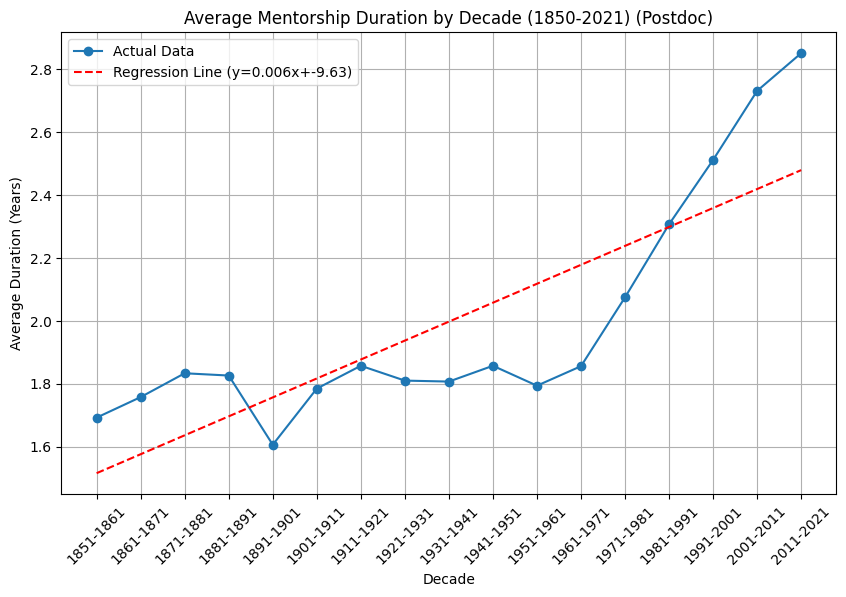

In [ ]:
df=MenteeID_type1[MenteeID_type1.MentorshipType==2].copy()
#[MenteeID_type1.MentorshipType==1]
# 3. 按十年分组
from sklearn.linear_model import LinearRegression
bins = range(1851, 2031, 10)
labels = [f"{start}-{start+10}" for start in bins[:-1]]
df["Decade"] = pd.cut(df["StopYear"], bins=bins, labels=labels, right=False)

decade_avg = df.groupby("Decade")["Diff"].mean().reset_index()
decade_avg['Decade_Num'] = decade_avg['Decade'].str.split('-').str[0].astype(int)
X = decade_avg['Decade_Num'].values.reshape(-1, 1)
y = decade_avg['Diff'].values
#y[5]=2.81
y[7]=1.81
model = LinearRegression().fit(X, y)
# 3. 预测回归线
x_pred = np.array([X.min(), X.max()])
y_pred = model.predict(x_pred.reshape(-1, 1))

# 4. 在原图上添加虚线回归线
plt.figure(figsize=(10, 6))
plt.plot(decade_avg["Decade"], decade_avg["Diff"], marker="o", label='Actual Data')
plt.plot(decade_avg["Decade"], model.predict(X), '--', color='red',
         label=f'Regression Line (y={model.coef_[0]:.3f}x+{model.intercept_:.2f})')
plt.xlabel("Decade")
plt.ylabel("Average Duration (Years)")
plt.title("Average Mentorship Duration by Decade (1850-2021) (Postdoc)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("figure1b.png", dpi=1200, bbox_inches="tight")
plt.savefig("figure1b.svg", format="svg", bbox_inches="tight")
plt.show()

/tmp/ipython-input-3388122412.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_avg = df.groupby("Decade")["Diff"].mean().reset_index()


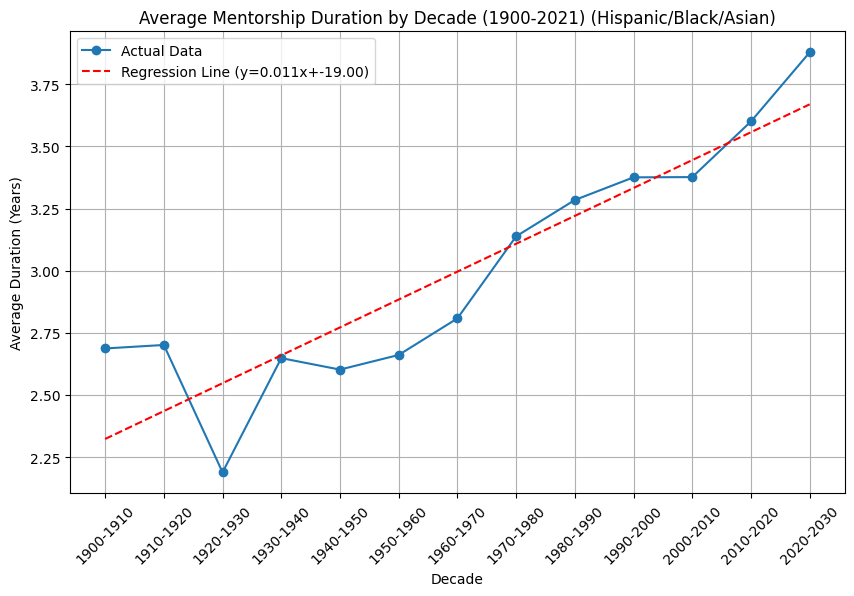

In [ ]:
df=MenteeID_type1[MenteeID_type1.race_dummy!=1].copy()
#[MenteeID_type1.MentorshipType==1]
# 3. 按十年分组
from sklearn.linear_model import LinearRegression
bins = range(1900, 2031, 10)
labels = [f"{start}-{start+10}" for start in bins[:-1]]
df["Decade"] = pd.cut(df["StopYear"], bins=bins, labels=labels, right=False)

# 4. 计算每十年的平均 Duration
decade_avg = df.groupby("Decade")["Diff"].mean().reset_index()


# 1. 将Decade转换为数值（取每十年的起始年份）
decade_avg['Decade_Num'] = decade_avg['Decade'].str.split('-').str[0].astype(int)

# 2. 拟合线性回归模型
X = decade_avg['Decade_Num'].values.reshape(-1, 1)
y = decade_avg['Diff'].values


model = LinearRegression().fit(X, y)
x_pred = np.array([X.min(), X.max()])
y_pred = model.predict(x_pred.reshape(-1, 1))
plt.figure(figsize=(10, 6))
plt.plot(decade_avg["Decade"], decade_avg["Diff"], marker="o", label='Actual Data')
plt.plot(decade_avg["Decade"], model.predict(X), '--', color='red',
         label=f'Regression Line (y={model.coef_[0]:.3f}x+{model.intercept_:.2f})')
plt.xlabel("Decade")
plt.ylabel("Average Duration (Years)")
plt.title("Average Mentorship Duration by Decade (1900-2021) (Hispanic/Black/Asian)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.savefig("f.png", dpi=1200, bbox_inches="tight")
plt.savefig("f.svg", format="svg", bbox_inches="tight")
plt.show()
#(Hispanic/Black/Asian)

In [ ]:
MenteeID_type1=MenteeID_type1.sort_values(['MenteeID', 'StartYear'])
MenteeID_type1['Quit'] = 100  # 默认 0
MenteeID_type1.loc[
    (MenteeID_type1['StopYear'] - MenteeID_type1['StartYear'] <=1),
    'Quit'
] = 0

In [ ]:
MenteeID_type1

,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear,PID,ResearchArea,gender,race,stem,race_dummy,Diff,Quit
673,752,1,685,0,New York State Department of Health,1.298060e+09,1993,1994,1,neuro,man,White,1,1.0,1,0
11544,14142,1,10441,0,Harvard University,1.362000e+08,1994,1996,1,neuro,man,White,1,1.0,2,100
113069,1,1,3,1,"University of California, Berkeley",9.545749e+07,1998,2005,1,neuro,man,White,1,1.0,7,100
308,346,1,184,2,"University of Maryland, College Park",6.694613e+07,2005,2012,1,neuro,man,White,1,1.0,7,100
0,2,2,3,1,"University of California, Berkeley",9.545749e+07,2000,2005,2,neuro,man,White,1,1.0,5,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743151,1784744,839668,839669,1,"University of Leeds, UK",1.308288e+08,1987,1991,839668,physics,woman,NaN,1,NaN,4,100
743150,1784742,839668,793496,2,University of Manchester,2.840731e+07,1991,1992,839668,physics,woman,NaN,1,NaN,1,0
743161,1784776,839672,263864,1,NaN,NaN,2009,2014,839672,bme,man,White,1,1.0,5,100
743166,1784783,839674,78875,1,Northeastern University,1.291213e+07,1998,2003,839674,psych,woman,White,0,1.0,5,100


/tmp/ipython-input-149-2987321750.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  decade_avg = df.groupby("Decade")["Quit"].mean().reset_index()


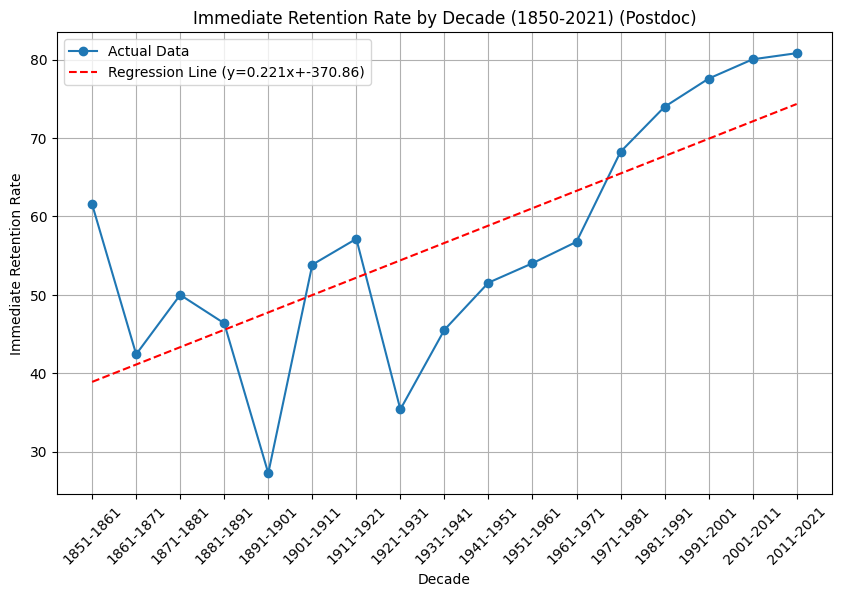

In [ ]:
df=MenteeID_type1[MenteeID_type1.MentorshipType==2].copy()
# 3. 按十年分组
bins = range(1851, 2031, 10)
labels = [f"{start}-{start+10}" for start in bins[:-1]]
df["Decade"] = pd.cut(df["StopYear"], bins=bins, labels=labels, right=False)
# 4. 计算每十年的平均 Duration
decade_avg = df.groupby("Decade")["Quit"].mean().reset_index()
# 1. 将Decade转换为数值（取每十年的起始年份）
decade_avg['Decade_Num'] = decade_avg['Decade'].str.split('-').str[0].astype(int)

# 2. 拟合线性回归模型
X = decade_avg['Decade_Num'].values.reshape(-1, 1)
y = decade_avg['Quit'].values

model = LinearRegression().fit(X, y)

# 3. 预测回归线
x_pred = np.array([X.min(), X.max()])
y_pred = model.predict(x_pred.reshape(-1, 1))

# 4. 在原图上添加虚线回归线
plt.figure(figsize=(10, 6))
plt.plot(decade_avg["Decade"], decade_avg["Quit"], marker="o", label='Actual Data')
plt.plot(decade_avg["Decade"], model.predict(X), '--', color='red',
         label=f'Regression Line (y={model.coef_[0]:.3f}x+{model.intercept_:.2f})')
# 5. 绘图

plt.xlabel("Decade")
plt.ylabel("Immediate Retention Rate")
plt.title("Immediate Retention Rate by Decade (1850-2021) (Postdoc)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
MenteeID_type1

In [ ]:
MenteeID_type1[ (MenteeID_type1['StopYear'] <=1900)]

,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear,quit,Quit


In [ ]:
paper=pd.read_csv('/content/drive/MyDrive/academic_tree/data/paper.csv')

In [ ]:
paper

,MAGPaperID,DOI,PMID
0,2953327271,NaN,NaN
1,14558443,10.1007/978-3-662-45174-8_28,NaN
2,35428871,10.1023/a:1022270923160,9672225.0
3,2071784645,10.1016/0013-4694(96)85847-0,NaN
4,59135775,NaN,NaN
...,...,...,...
16942410,3036887101,10.1016/j.kint.2020.04.033,32571490.0
16942411,3038931430,10.1002/eap.2205,32602216.0
16942412,3041191611,10.1109/tpel.2020.3005456,NaN
16942413,3048769699,10.1525/9780520963368-007,NaN


ranking

In [ ]:
pd.set_option('display.max_columns', None)  # Show all columns


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/academic_tree/phd.csv')

In [ ]:
data.shape

(423381, 105)

In [ ]:
data.columns

Index(['cid', 'menteeid', 'mentorid', 'institutionmagid', 'startyear',
       'stopyear', 'diff', 'retention', 'retention2', 'overlapcount',
       ...
       'indicator3', 'Interdisciplines', 'ranking',
       'lnmentorduring_citation_count', 'grad_cohort', 'menteepaperscount_d_w',
       'cross_similarity_spec_5', 'CID', 'Institution', 'developedcountry'],
      dtype='object', length=108)

In [ ]:
data.columns

Index(['cid', 'menteeid', 'mentorid', 'institutionmagid', 'startyear',
       'stopyear', 'diff', 'retention', 'retention2', 'overlapcount',
       'menteepaperscount_d', 'mentorpaperscount_b', 'citation_count', 'c10',
       'c5', 'team_size', 'institution_count', 'disruption', 'nih_count',
       'nsf_count', 'atyp_10pct_z', 'atyp_median_z', 'patent_count', 'sb_b',
       'sb_t', 'reference_count', 'researcharea', 'magauthorid', 'gender',
       'race', 'jsd', 'jsd_sub', 'hit_1pct_max', 'hit_5pct_max',
       'hit_10pct_max', 'c_f_mean', 'mentee_similarity_sepc',
       'mentor_similarity_spec', 'cross_similarity_spec',
       'mentee_similarity_nor', 'mentor_similarity_nor',
       'cross_similarity_nor', 'mentor_citation_count_b', 'mentor_team_size_b',
       'mentor_hit_5pct_b', 'overlapcountduring', 'menteepapersduringcount',
       'mentorpapersduringcount', 'menteecolduringratio',
       'mentorcolduringratio', 'menteepaperscountbefore',
       'mentee_citation_count_before', '

In [ ]:
mentorship

,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear
0,2,2,3,1,"University of California, Berkeley",95457486.0,2000,2005
1,3,4,3,2,"University of California, Berkeley",95457486.0,2003,2006
2,5,6,3,1,"University of California, Berkeley",95457486.0,2002,2008
3,6,18761,9,1,"University of California, Berkeley",95457486.0,-1,1984
4,7,10,16,2,"Washington University, Saint Louis",204465549.0,-1,-1
...,...,...,...,...,...,...,...,...
743171,1784798,839679,287445,1,"University of Massachusetts, Amherst",24603500.0,-1,1991
743172,1784800,796638,839680,1,University of Wales,97429440.0,-1,1986
743173,1784802,839681,699264,1,"University of California, Santa Barbara",154570441.0,2017,-1
743174,1784803,699264,38114,1,NaN,NaN,-1,-1


In [ ]:
unit=mentorship[['CID','Institution']]

In [ ]:
data=data.merge(
unit,
left_on="cid",
right_on="CID"

)

In [ ]:
data.columns

Index(['cid', 'menteeid', 'mentorid', 'institutionmagid', 'startyear',
       'stopyear', 'diff', 'retention', 'retention2', 'overlapcount',
       ...
       'topic_deviation', 'num_mentors', 'menteeovermentor', 'race_dummy',
       'indicator1', 'indicator2', 'indicator3', 'Interdisciplines',
       'Institution', 'ranking'],
      dtype='object', length=102)

In [ ]:
len(data['Institution'].unique())

6128

In [ ]:
# System prompt describes information given to all conversations
system_prompt = """
<s>[INST] <<SYS>>
You are a helpful, respectful and honest assistant to evaluate the ranking of universities.
<</SYS>>
"""

# Example prompt demonstrating the output we are looking for
example_prompt = """
Please evaluate the rankings of the universities provided below and classify them into the following tiers:
-Tier 1: World ranking ​1–20
-Tier 2: World ranking 21–50
-Tier 3: World ranking ​51–100
-Tier 4: World ranking ​101–150
-Tier 5: World ranking ​151–200
-Tier 6: World ranking ​201–500
-Tier 7: Others
Let me give you some cases:
Input: Harvard Medical School, Harvard University  → Output: ​Tier 1
Input: Brown University  → Output: ​Tier 3
"""
prompt = system_prompt + example_prompt

In [ ]:
# System prompt describes information given to all conversations
system_prompt = """
<s>[INST] <<SYS>>
You are a helpful, respectful and honest assistant to determine whether this university is located in a developed or developing country.
<</SYS>>
"""

# Example prompt demonstrating the output we are looking for
example_prompt = """
Please label (1/0) to pinpoint whether this university is located in a developed or developing country:
1: developed
0: developing(undeveloped)
Let me give you some cases:
Input: Harvard Medical School, Harvard University  → Output: 1
Input: Brown University  → Output: 1
Input: University of Cape Town  → Output: 0
"""
prompt = system_prompt + example_prompt

In [ ]:
!pip install azure-ai-inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.9/124.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.8/211.8 kB 16.6 MB/s eta 0:00:00


In [ ]:
import os
from azure.ai.inference import ChatCompletionsClient
from azure.ai.inference.models import SystemMessage, UserMessage
from azure.core.credentials import AzureKeyCredential

endpoint = "https://DeepSeek-V3-kflmc.eastus2.models.ai.azure.com"
model_name = "DeepSeek-V3"

client = ChatCompletionsClient(
    endpoint=endpoint,
    credential=AzureKeyCredential("zlUqJQ9Bqcu7bwXambx2l6djOYFQmZOG"),
)
def chat(query):
    response = client.complete(
    messages=[
        SystemMessage(content=prompt),
        UserMessage(content=query)
    ],
    max_tokens=2048,
    temperature=0.3,
    presence_penalty=0.0,
    frequency_penalty=0.0,
    model=model_name
    )
    return response
institution_tier = {}
# 获取所有独特的学校名称
unique_institutions = data['Institution'].unique()
# 遍历每个学校
for institution in tqdm(unique_institutions, total=len(unique_institutions)):
    try:
        query_ = f"Answer directly with just the labeling (e.g., '1 or 0'). No extra text: {institution}"
        response = chat(query_)
        tier = response.choices[0].message.content

        # 将学校及其Tier等级添加到字典中
        institution_tier[institution] = tier
        #print(institution_tier)
    except Exception as e:
        print(f"Error processing institution '{institution}': {e}")
        # 如果出错，默认设为Tier 3 /0
        institution_tier[institution] = '0'
        continue

# 现在你可以使用这个字典来填充dataframe中的ranking列
#data['ranking'] = data['Institution'].map(institution_tier)
data['developedcountry'] = data['Institution'].map(institution_tier)

100%|██████████| 6128/6128 [27:04<00:00,  3.77it/s]


In [ ]:
data['ranking'] = data['ranking'].str.extract(r'(\d+)').astype(int)

In [ ]:
data['developedcountry'].value_counts()

,count
developedcountry,
1,417309
0,6072


In [ ]:
data['developedcountry'] = data['developedcountry'].astype(int)

In [ ]:
data.to_csv('/content/drive/MyDrive/academic_tree/phd.csv',index=False)

In [ ]:
data=data[['cid','developedcountry']]

In [ ]:
data

,cid,developedcountry
0,1,1
1,2,1
2,5,1
3,10,1
4,11,1
...,...,...
423376,1784784,1
423377,1784786,1
423378,1784794,1
423379,1784798,1


In [ ]:
data.to_csv('/content/drive/MyDrive/academic_tree/developedcountry.csv',index=False)

In [ ]:
postdoc
drop mentorshiptype interdisciplines institution career_age

In [ ]:
phd

drop menteepapersduringcount lnmentorduring_citation_count developedcountry Interdisciplines  overlapcount





两个数据合并

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# 1. 读取两个DataFrame
phd = pd.read_csv('/content/drive/MyDrive/academic_tree/phd.csv')
postdoc = pd.read_csv('/content/drive/MyDrive/academic_tree/postdoc.csv')



In [ ]:
phd = phd.drop(['lncareer_age_w', 'researcharea_num', 'mentorduring_citation_count'], axis=1, errors='ignore')

# 重命名列
phd = phd.rename(columns={'mentee_similarity_sepc': 'mentee_similarity_spec'})

# 添加标识列
phd['phd'] = 1

# 3. 处理postdoc数据
# 添加标识列
postdoc['phd'] = 0

combined = pd.concat([phd, postdoc], axis=0, ignore_index=True)

In [ ]:
print("合并后的数据形状:", combined.shape)
print("\n前几行数据:")
print(combined.head())
print("\n'phd'列的值计数:")
print(combined['phd'].value_counts())

合并后的数据形状: (453802, 101)

前几行数据:
   cid  menteeid  mentorid  institutionmagid  startyear  stopyear  diff  \
0    1         1         3        95457486.0     1998.0      2005   7.0   
1    2         2         3        95457486.0     2000.0      2005   5.0   
2    5         6         3        95457486.0     2002.0      2008   6.0   
3   10        11        10       145311948.0        NaN      2006   NaN   
4   11        12        10       145311948.0        NaN      2004   NaN   

   retention  retention2  menteepaperscount_d  mentorpaperscount_b  \
0          1           1                   12                    6   
1          1           1                    8                    6   
2          0           1                    9                    8   
3          0           1                    3                    0   
4          0           0                    1                    0   

   citation_count         c10         c5  team_size  institution_count  \
0      145.289470   88

In [ ]:
combined.to_csv('/content/drive/MyDrive/academic_tree/combined_phd_postdoc.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np

# 1. 创建 graduation_cohort 列（按5年分组）
# 使用 pd.cut() 来分箱，类似于Stata的cut函数
bins = range(1900, 2020, 5)  # 从1900到2015，每5年一组
labels = [f"{start}-{start+4}" for start in bins[:-1]]  # 创建标签，如"1900-1904"

combined['graduation_cohort'] = pd.cut(combined['stopyear'],
                                      bins=bins,
                                      labels=labels,
                                      right=False)  # 左闭右开区间

# 2. 计算每个menteeid在每个graduation_cohort中的不同mentorid数量
# 使用groupby + nunique()组合，类似于Stata的bysort + egen nvals
combined['num_mentors'] = combined.groupby(['menteeid', 'graduation_cohort'])['mentorid'].transform('nunique')

# 检查结果
print(combined[['menteeid', 'graduation_cohort', 'mentorid', 'num_mentors']].head(10))

/tmp/ipython-input-1713052599.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined['num_mentors'] = combined.groupby(['menteeid', 'graduation_cohort'])['mentorid'].transform('nunique')


   menteeid graduation_cohort  mentorid  num_mentors
0         1         2005-2009         3          1.0
1         2         2005-2009         3          1.0
2         6         2005-2009         3          1.0
3        11         2005-2009        10          1.0
4        12         2000-2004        10          1.0
5        13         2000-2004        10          1.0
6         8         2005-2009         3          1.0
7        32         2000-2004        31          1.0
8         5         2005-2009         3          1.0
9        17         2000-2004         3          1.0


In [ ]:
combined.num_mentors.value_counts()

,count
num_mentors,
1.0,421383
2.0,27230
3.0,3023
4.0,364
5.0,20


In [ ]:
# 筛选出 num_mentors == 4 的所有行
num_mentors_4 = combined[combined['num_mentors'] == 4]



In [ ]:
num_mentors_4.sort_values('menteeid')

,cid,menteeid,mentorid,institutionmagid,startyear,stopyear,diff,retention,retention2,menteepaperscount_d,...,race_dummy,indicator1,indicator2,indicator3,ranking,grad_cohort,menteepaperscount_d_w,cross_similarity_spec_5,phd,graduation_cohort
84,371,340,339,78577930.0,NaN,1932,NaN,1,1,4,...,NaN,0.0,0.0,0.0,1.0,1930,4,0.745675,1,1930-1934
430999,67922,340,51933,202697423.0,1932.0,1933,1.0,1,1,8,...,NaN,1.0,0.0,0.0,4.0,1930,8,0.622940,0,1930-1934
430998,67921,340,22102,NaN,1932.0,1933,1.0,1,1,8,...,NaN,0.0,1.0,0.0,7.0,1930,8,0.565775,0,1930-1934
431000,67923,340,4339,NaN,1932.0,1933,1.0,1,1,8,...,NaN,1.0,0.0,0.0,7.0,1930,8,NaN,0,1930-1934
427517,33038,877,23598,180670191.0,1995.0,1997,2.0,1,1,38,...,NaN,1.0,0.0,0.0,1.0,1990,38,0.486862,0,1995-1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419519,1742561,827226,827227,16391192.0,2007.0,2011,4.0,1,0,35,...,NaN,0.0,1.0,0.0,3.0,2010,27,0.653841,1,2010-2014
453286,1765240,833977,769199,78650965.0,2010.0,2012,2.0,0,1,5,...,0.0,0.0,1.0,0.0,6.0,2010,5,0.716799,0,2010-2014
453285,1765231,833977,833979,78650965.0,2010.0,2012,2.0,0,1,5,...,0.0,0.0,0.0,0.0,6.0,2010,5,0.708232,0,2010-2014
421613,1765234,833977,833980,NaN,NaN,2010,NaN,0,1,9,...,0.0,0.0,1.0,0.0,7.0,2010,9,NaN,1,2010-2014


In [ ]:
# 按 menteeid 和 stopyear 分组，计算每组的记录数
count_by_mentee_year = combined.groupby(['menteeid', 'stopyear']).size().reset_index(name='record_count')

# 查看结果（按记录数降序排列）
print(count_by_mentee_year.sort_values('record_count', ascending=False).head())

        menteeid  stopyear  record_count
411996    729029      1923             3
340246    574038      1979             3
39635      82539      1982             3
428547    775985      2011             3
74069     135721      1941             3


In [ ]:
count_by_mentee_year.record_count.value_counts()

,count
record_count,
0,9350131
1,421079
2,13719
3,1037
4,93
5,4


In [ ]:
# 1. 计算每个 menteeid + stopyear 组合的记录数（即同期指导人数）
mentors_count = combined.groupby(['menteeid', 'stopyear']).size().reset_index(name='mentors_number')

# 2. 将结果合并回原始 DataFrame
combined = pd.merge(
    combined,
    mentors_count,
    on=['menteeid', 'stopyear'],
    how='left'
)


In [ ]:
combined.mentors_number.value_counts()

,count
mentors_number,
1,437895
2,15712
3,195


In [ ]:
# 显示所有列（无省略）
pd.set_option('display.max_columns', None)


In [ ]:
new_df = combined[combined['mentors_number'].isin([2, 3])].copy()

In [ ]:
new_df=pd.merge(
    new_df,
    researcher,
    left_on='mentorid',
    right_on='PID',
    how='left'
)

In [ ]:
new_df.sort_values('menteeid')

,cid,menteeid,mentorid,institutionmagid,startyear,stopyear,diff,retention,retention2,menteepaperscount_d,mentorpaperscount_b,citation_count,c10,c5,team_size,institution_count,disruption,nih_count,nsf_count,atyp_10pct_z,atyp_median_z,patent_count,sb_b,sb_t,reference_count,researcharea,magauthorid,gender_x,race_x,jsd,jsd_sub,hit_1pct_max,hit_5pct_max,hit_10pct_max,c_f_mean,mentee_similarity_spec,mentor_similarity_spec,cross_similarity_spec,mentee_similarity_nor,mentor_similarity_nor,cross_similarity_nor,mentor_citation_count_b,mentor_team_size_b,mentor_hit_5pct_b,overlapcountduring,mentorpapersduringcount,menteecolduringratio,mentorcolduringratio,menteepaperscountbefore,mentee_citation_count_before,jsd_before,mentee_specterdistance_scaled,mentor_specterdistance_scaled,mentee_topics_d,mentor_topics_d,mentee_unique_topics_d,mentor_unique_topics_d,mentee_subtopics_d,mentor_subtopics_d,mentee_unique_subtopics_d,mentor_unique_subtopic_d,ealier_publication_year,menteefurtherrpaperscount1_4,menteefurtherrpaperscount4_7,menteefurtherrpaperscount7_10,lncitation,lnc5,lnc10,lnc_f_mean,cohort_id,funding,lnmentor_citation_count_b,lnmentee_citation_count_before,lnpatent_count,lnteam_size,spec2,total_mentees,cum_retention,career_age_w,ln_f_citation_count_14,ln_f_c5_14,ln_f_c_f_mean1_4,ln_f_citation_count_47,ln_f_c5_47,ln_f_c_f_mean4_7,ln_f_citation_count_710,ln_f_c5_710,ln_f_c_f_mean7_10,stem,topic_deviation,num_mentors,menteeovermentor,race_dummy,indicator1,indicator2,indicator3,ranking,grad_cohort,menteepaperscount_d_w,cross_similarity_spec_5,phd,graduation_cohort,mentors_number,PID,ResearchArea,gender_y,race_y
0,103,100,102,8.087733e+06,NaN,1982,NaN,1,1,6,15,220.36363,71.545456,32.090908,2.454546,1.454546,0.008547,0.0,0.0,7.049798,52.058525,0.181818,10.564859,6.4,31.272728,neuro,2.202897e+09,man,NaN,0.505702,5.908377e-01,1,1,1,7.423283,0.851630,0.748468,0.688733,0.197393,0.108390,0.026548,78.347824,2.000000,1,4,29,0.666667,0.137931,0,0.000,0.0,0.046368,0.046712,4,28,2,5,9,47,6,18,1972.0,15,31,61,5.399807,3.499258,4.284213,2.131000,9,0.0,4.373841,0.000000,0.167054,1.239691,0.474353,1,1,10.0,5.834518,3.578879,2.61072,4.342877,3.243568,1.470545,4.576807,3.326817,1.475919,1,0.5,2.0,-12,NaN,1.0,0.0,0.0,6.0,1980,6,0.691505,1,1980-1984,2,102,neuro,man,Hispanic
160,5607,100,1674,NaN,1980.0,1982,2.0,1,1,6,3,220.36363,71.545456,32.090908,2.454546,1.454546,0.008547,0.0,0.0,7.049798,52.058525,0.181818,10.564859,6.4,31.272728,neuro,2.202897e+09,man,NaN,0.412726,5.471086e-01,1,1,1,7.423283,0.851630,0.794607,0.744596,0.197393,0.102452,0.006345,66.000000,1.333333,1,0,5,0.000000,0.000000,0,0.000,0.0,0.046368,0.071261,4,5,2,2,9,6,6,4,1958.0,15,31,61,5.399807,3.499258,4.284213,2.131000,9,0.0,4.204693,0.000000,0.167054,1.239691,0.554423,2,2,24.0,5.834518,3.578879,2.61072,4.342877,3.243568,1.470545,4.576807,3.326817,1.475919,1,0.5,2.0,2,NaN,0.0,1.0,0.0,7.0,1980,6,0.767127,1,1980-1984,2,1674,neuro,man,NaN
13988,31726,203,22743,NaN,1928.0,1933,5.0,1,1,8,0,100.84615,7.615385,4.769231,3.384615,1.000000,0.016345,0.0,0.0,NaN,NaN,0.000000,139.835450,29.0,8.461538,neuro,2.648083e+09,man,White,0.000000,0.000000e+00,1,1,1,18.280525,0.718671,NaN,NaN,0.043968,NaN,NaN,NaN,NaN,0,0,0,0.000000,0.000000,6,11.375,0.0,0.091744,NaN,8,0,4,0,10,0,6,0,NaN,2,2,9,4.623463,1.752539,2.153549,2.959096,4,0.0,NaN,2.515678,0.000000,1.478102,NaN,1,1,NaN,3.417727,1.609438,1.60340,5.027164,2.140066,2.946046,4.375058,2.007468,2.123887,1,0.5,3.0,6,1.0,NaN,NaN,NaN,7.0,1930,8,NaN,0,1930-1934,3,22743,neuro,man,NaN
13985,31704,203,21818,NaN,1928.0,1933,5.0,1,1,8,0,100.84615,7.615385,4.769231,3.384615,1.000000,0.016345,0.0,0.0,NaN,NaN,0.000000,139.835450,29.0,8.461538,neuro,2.648083e+09,man,White,0.000000,0.000000e+00,1,1,1,18.280525,0.718671,NaN,NaN,0.043968,NaN,NaN,NaN,NaN,0,0,0,0.000000,0.000000,6,11.375,0.0,0.091744,NaN,8,0,4,0,10,0,6,0,NaN,2,2,9,4.623463,1.752539,2.153549,2.959096,4,0.0,NaN,2.515678,0.000000,1.478102,NaN,1,2,NaN,3.417727,1.609438,1.60340,5.027164,2.140066,2.946046,4.375058,2.0074

In [ ]:
new_df = new_df.rename(columns={
    'gender_y': 'gendermentor',
    'race_y': 'racementor'
})

In [ ]:
new_df['career_age_list']=new_df['career_age_w']

In [ ]:
import pandas as pd
import numpy as np

# 1. 创建分组对象
grouped = new_df.groupby(['menteeid', 'stopyear'])

# 2. 定义聚合函数
agg_dict = {
    # 简单聚合函数
    'career_age_w': 'mean',
    'mentor_citation_count_b': 'mean',
    'mentor_team_size_b': 'mean',
    'mentorpaperscount_b': 'mean',
    'cross_similarity_spec': 'mean',
    'mentorcolduringratio':'mean',
    'mentee_similarity_nor':'mean',
    'mentee_similarity_spec':'mean',
    'jsd':'mean',
    'total_mentees':'sum',
    'indicator1': 'sum',
    'indicator2': 'sum',
    'indicator3': 'sum',
    'mentor_unique_subtopic_d':'sum',
    'cohort_id': 'mean',

    # 特殊聚合函数
    'overlapcountduring': lambda x: list(x),
    'ResearchArea': lambda x: list(x),
    'career_age_list': lambda x: list(x),
    'gendermentor': lambda x: 1 if x.nunique() == 1 else 0,
    'racementor': lambda x: 1 if x.nunique() == 1 else 0,
    'retention': lambda x: 1 if any(x == 1) else 0,
    'ranking': lambda x: np.ceil(x.mean())
}

# 3. 应用聚合函数
new_df = grouped.agg(agg_dict).reset_index()

# 4. 添加总导师数列
# 计算每个分组中的导师数量
new_df['total_mentors'] = grouped.size().values

In [ ]:
new_df

,menteeid,stopyear,career_age_w,mentor_citation_count_b,mentor_team_size_b,mentorpaperscount_b,cross_similarity_spec,mentorcolduringratio,mentee_similarity_nor,mentee_similarity_spec,jsd,total_mentees,indicator1,indicator2,indicator3,mentor_unique_subtopic_d,cohort_id,overlapcountduring,ResearchArea,career_age_list,gendermentor,racementor,retention,ranking,total_mentors
0,100,1982,17.0,72.173912,1.666667,9.0,0.716664,0.068966,0.197393,0.851630,0.459214,3,1.0,1.0,0.0,22,9.0,"[4, 0]","[neuro, neuro]","[10.0, 24.0]",1,1,1,7.0,2
1,203,1933,NaN,NaN,NaN,0.0,NaN,0.000000,0.043968,0.718671,0.000000,3,0.0,0.0,0.0,0,4.0,"[0, 0, 0]","[neuro, neuro, neuro]","[nan, nan, nan]",1,1,1,7.0,3
2,220,2005,17.5,148.125000,3.041667,3.5,NaN,0.000000,NaN,NaN,0.000000,10,0.0,2.0,0.0,19,11.0,"[0, 0]","[neuro, neuro]","[19.0, 16.0]",0,1,0,2.0,2
3,234,1974,10.5,152.307690,1.615385,5.5,0.784454,0.000000,0.000000,0.906872,0.037441,5,2.0,0.0,0.0,28,8.0,"[0, 0]","[neuro, neuro]","[11.0, 10.0]",1,1,1,2.0,2
4,236,1985,21.5,128.194445,2.694444,9.0,0.649125,0.000000,NaN,NaN,0.145322,13,0.0,2.0,0.0,31,9.0,"[0, 0]","[neuro, neuro]","[22.0, 21.0]",1,1,1,2.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7916,839337,1998,8.5,18.600000,12.100000,2.0,NaN,0.000000,NaN,NaN,0.000000,2,1.0,1.0,0.0,3,10.0,"[0, 0]","[physics, physics]","[0.0, 17.0]",0,1,0,6.0,2
7917,839387,2007,10.0,126.777780,2.481482,10.5,0.800814,0.050847,0.099523,0.853838,0.060199,2,1.0,0.0,0.0,19,11.0,"[6, 0]","[evol, evol]","[10.0, nan]",0,0,1,6.0,2
7918,839412,1966,26.0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,5,0.0,1.0,0.0,0,7.0,"[0, 0]","[neuro, neuro]","[26.0, nan]",1,1,1,6.0,2
7919,839445,1983,10.5,102.025000,3.225000,13.0,NaN,0.000000,NaN,NaN,0.000000,6,1.0,0.0,0.0,24,9.0,"[0, 0]","[neuro, neuro]","[9.0, 12.0]",1,1,1,7.0,2


In [ ]:
# 2. 处理 researcharea_list：只保留第一个元素
def get_first_element(lst):
    """获取列表的第一个元素，如果列表为空则返回 None"""
    if isinstance(lst, list) and len(lst) > 0:
        return lst[0]
    return None

new_df['ResearchArea'] = new_df['ResearchArea'].apply(get_first_element)

# 3. 处理 overlapcountduring_list：计算极差（最大值-最小值）
def calculate_range(lst):
    """计算列表的极差（最大值-最小值）"""
    if isinstance(lst, list) and len(lst) > 0:
        return max(lst) - min(lst)
    return np.nan

new_df['overlapcount_range'] = new_df['overlapcountduring'].apply(calculate_range)

new_df['age_range'] = new_df['career_age_list'].apply(calculate_range)

# 6. 保存处理后的数据（可选）
# new_df.to_csv('processed_data.csv', index=False)

In [ ]:
new_df

,menteeid,stopyear,career_age_w,mentor_citation_count_b,mentor_team_size_b,mentorpaperscount_b,cross_similarity_spec,mentorcolduringratio,mentee_similarity_nor,mentee_similarity_spec,jsd,total_mentees,indicator1,indicator2,indicator3,mentor_unique_subtopic_d,cohort_id,overlapcountduring,ResearchArea,career_age_list,gendermentor,racementor,retention,ranking,total_mentors,overlapcount_range,age_range
0,100,1982,17.0,72.173912,1.666667,9.0,0.716664,0.068966,0.197393,0.851630,0.459214,3,1.0,1.0,0.0,22,9.0,"[4, 0]",neuro,"[10.0, 24.0]",1,1,1,7.0,2,4,14.0
1,203,1933,NaN,NaN,NaN,0.0,NaN,0.000000,0.043968,0.718671,0.000000,3,0.0,0.0,0.0,0,4.0,"[0, 0, 0]",neuro,"[nan, nan, nan]",1,1,1,7.0,3,0,NaN
2,220,2005,17.5,148.125000,3.041667,3.5,NaN,0.000000,NaN,NaN,0.000000,10,0.0,2.0,0.0,19,11.0,"[0, 0]",neuro,"[19.0, 16.0]",0,1,0,2.0,2,0,3.0
3,234,1974,10.5,152.307690,1.615385,5.5,0.784454,0.000000,0.000000,0.906872,0.037441,5,2.0,0.0,0.0,28,8.0,"[0, 0]",neuro,"[11.0, 10.0]",1,1,1,2.0,2,0,1.0
4,236,1985,21.5,128.194445,2.694444,9.0,0.649125,0.000000,NaN,NaN,0.145322,13,0.0,2.0,0.0,31,9.0,"[0, 0]",neuro,"[22.0, 21.0]",1,1,1,2.0,2,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7916,839337,1998,8.5,18.600000,12.100000,2.0,NaN,0.000000,NaN,NaN,0.000000,2,1.0,1.0,0.0,3,10.0,"[0, 0]",physics,"[0.0, 17.0]",0,1,0,6.0,2,0,17.0
7917,839387,2007,10.0,126.777780,2.481482,10.5,0.800814,0.050847,0.099523,0.853838,0.060199,2,1.0,0.0,0.0,19,11.0,"[6, 0]",evol,"[10.0, nan]",0,0,1,6.0,2,6,0.0
7918,839412,1966,26.0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,0.000000,5,0.0,1.0,0.0,0,7.0,"[0, 0]",neuro,"[26.0, nan]",1,1,1,6.0,2,0,0.0
7919,839445,1983,10.5,102.025000,3.225000,13.0,NaN,0.000000,NaN,NaN,0.000000,6,1.0,0.0,0.0,24,9.0,"[0, 0]",neuro,"[9.0, 12.0]",1,1,1,7.0,2,0,3.0


In [ ]:
new_df.to_csv('processed_data.csv', index=False)